In [1]:
# The correlation of properties at 200 Ry ???

# The correlation of recommended cutoffs.

In [2]:
%matplotlib inline

In [3]:
import json
import os
import pathlib

SSSP_DB_PATH = pathlib.Path(os.path.join("..", "sssp_db")) 
elements = [os.path.splitext(i)[0] for i in os.listdir(SSSP_DB_PATH) if ".json" in i]

In [4]:
def extract_rec_cutoff(p1, p2):
    xs = []
    ys = []
    for e in elements:
        with open(os.path.join(SSSP_DB_PATH, f"{e}.json")) as fh:
            data = json.load(fh)
            
            for key, value in data.items():
                con_p1 = value.get("convergence", {}).get(p1, {}).get("output_parameters", {}).get("wavefunction_cutoff", -1)
                con_p2 = value.get("convergence", {}).get(p2, {}).get("output_parameters", {}).get("wavefunction_cutoff", -1)
                
                
                if con_p1 > 0 and con_p2 > 0:
                    xs.append(con_p1)
                    ys.append(con_p2)
        
    return xs, ys

Text(0.5, 0.98, 'accuracy correlation of oxides: XO with others (delta)')

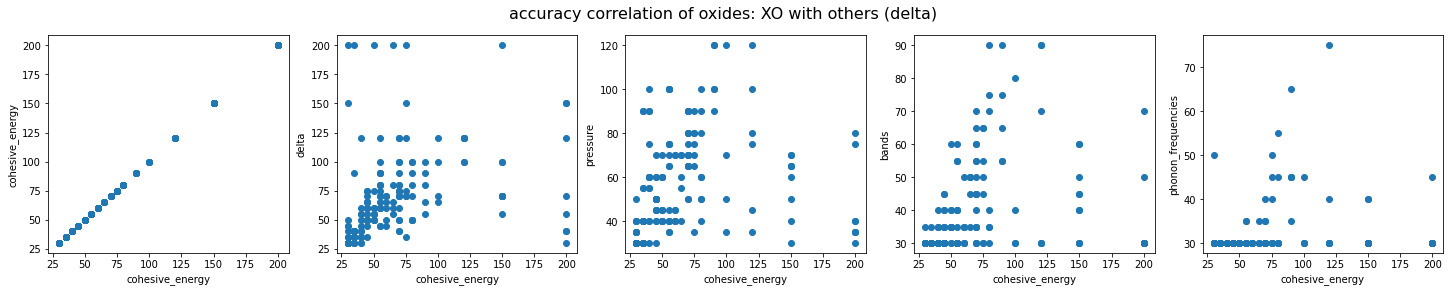

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(25, 4))

p1_key = "cohesive_energy"

for i, p2_key in enumerate(["cohesive_energy", "delta", "pressure", "bands", "phonon_frequencies"]):
    xss, yss = extract_rec_cutoff(p1_key, p2_key)
    axes[i].scatter(xss, yss)
    axes[i].set_xlabel(p1_key)
    axes[i].set_ylabel(p2_key)
    
fig.suptitle('convergence correlation of pseudo ITO recommend cutoff: cohesive', fontsize=16)

Text(0.5, 0.98, 'accuracy correlation of oxides: XO with others (delta)')

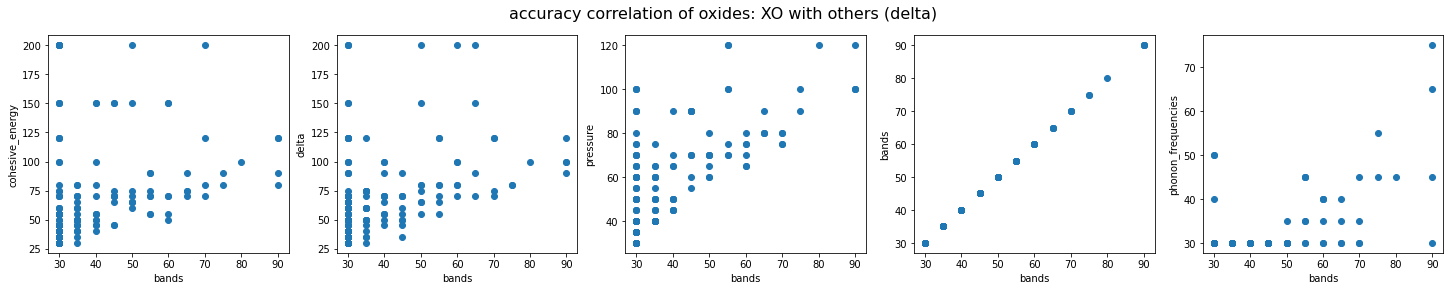

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(25, 4))

p1_key = "bands"

for i, p2_key in enumerate(["cohesive_energy", "delta", "pressure", "bands", "phonon_frequencies"]):
    xss, yss = extract_rec_cutoff(p1_key, p2_key)
    axes[i].scatter(xss, yss)
    axes[i].set_xlabel(p1_key)
    axes[i].set_ylabel(p2_key)
    
fig.suptitle('accuracy correlation of oxides: XO with others (delta)', fontsize=16)